In [1]:
%run helper_functions.py
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
sns.set_style("whitegrid")
np.set_printoptions(suppress=True)

# Example 1-D with random data

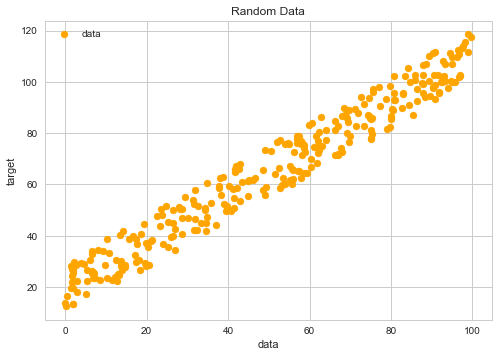

In [9]:
# create random data: generates the model basics. 
# 300 observations, intercept equals 20, the beta-coefficient equals 0.9 and the random spread is 20.

num_random_points = 300
intercept = 20
coefficient = 0.9
random_spread = 20


rng = np.random.RandomState(1)

# Definition of X: 300 random numbers from 0 to 100
X = np.sort(100 * rng.rand(num_random_points, 1), axis=0)

y = intercept + coefficient*X

#add noise
y += random_spread * (0.5 - rng.rand(num_random_points, 1))

#outliers
#y[-1] = -200
#X[-1] = 200

# Plot the random data
plt.figure()
plt.scatter(X, y, c="orange", label="data")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Data")
plt.legend()
plt.show()



# Linear regression
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [10]:
from sklearn.linear_model import LinearRegression


regr  = LinearRegression()
regr.fit(X, y)

# Show the model coefficients w
print ('Coefficients: \n', regr.coef_)
print ('Intercept   : \n',  regr.intercept_)

Coefficients: 
 [[ 0.90722997]]
Intercept   : 
 [ 19.69176014]


### Predicting on new data

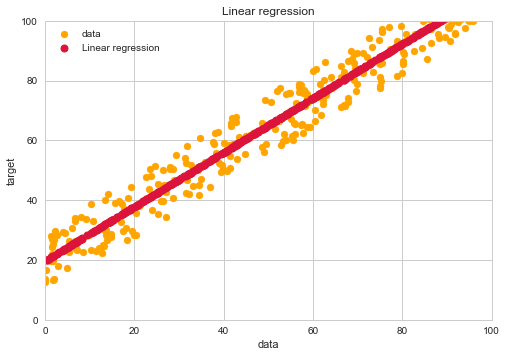

In [11]:
# Test set. We generate 500 numbers from 0-100 and predict their y values
X_test = 100 * rng.rand(500, 1)
y_test_pred = regr.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="orange", label="data")
plt.scatter(X_test, y_test_pred, color="crimson", label="Linear regression", linewidth=1)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Linear regression")
plt.legend()
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

### Metrics

In [12]:
from sklearn.metrics import mean_squared_error

y_pred =  regr.predict(X)

# The mean squared error (training)
print("Mean squared error on training set: %.2f" %mean_squared_error(y, y_pred))

#Explained Variance score
print('R squared score: %.2f' % regr.score(X, y))

Mean squared error on training set: 33.64
R squared score: 0.96


# Example with real data 
- Loading the boston house price dataset
- This dataset has more than one feature (multivariate regression)


In [17]:
# Load the boston dataset from sklearn
from sklearn import datasets
dataset = datasets.load_boston()


In [20]:
print(dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [23]:
X = dataset.data
y = dataset.target

# these data are not shuffled...
from sklearn.utils import shuffle
X, y = sklearn.utils.shuffle(X,y)

In [56]:
pd.DataFrame(X, columns=dataset.feature_names).head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000908,0.0,0.036513,0.0,0.001041,0.010260,0.163301,0.002783,0.006672,0.728931,0.035362,0.662043,0.030792
1,0.000059,0.0,0.015174,0.0,0.001007,0.015421,0.131140,0.010661,0.004293,0.519409,0.038204,0.843138,0.008650
2,0.004970,0.0,0.024332,0.0,0.000965,0.006672,0.122872,0.002356,0.032264,0.895324,0.027155,0.424849,0.018821


In [55]:
from sklearn.preprocessing import Normalizer
X  = Normalizer().fit_transform(X)

In [ ]:
#standardizer -> Mean = 0, Std. Dev. = 1

from sklearn.preprocessing import StandardScaler
X  = StandardScaler().fit_transform(X)

## Cross val

In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import *

regr  = LinearRegression()
y_pred = cross_val_predict(regr, X, y, cv=10)

print ("R2  (cross-val) : %.2f"% explained_variance_score(y, y_pred))
print ("MSE (cross-val) : %.2f"% mean_squared_error(y, y_pred))

R2  (cross-val) : 0.73
MSE (cross-val) : 22.80


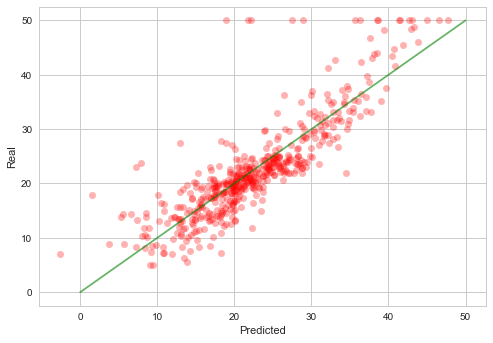

In [32]:
plt.plot(y_pred, y,'ro', alpha = 0.3)
plt.plot([0,np.max(y)], [0, np.max(y)], 'g-', alpha = 0.6)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

In [33]:
# Show the model coefficients w
regr.fit(X, y)
print ('Coefficients: \n', regr.coef_, "\n")

Coefficients: 
 [  -85.80089818    15.76680628    28.82654014  1282.13123882 -6226.6142456
  2768.21983348    -1.16033436  -544.95496681   145.22607495     2.2347785
  -395.59285434    10.39739569  -242.57494974] 



In [35]:
print ("\n  F(X) =  %2.3f "% regr.intercept_,  end='' )
for i in range(len(dataset.feature_names)):
    print ("%+2.2f*%s "%(regr.coef_[i], dataset.feature_names[i]) , end='')



  F(X) =  8.210 -85.80*CRIM +15.77*ZN +28.83*INDUS +1282.13*CHAS -6226.61*NOX +2768.22*RM -1.16*AGE -544.95*DIS +145.23*RAD +2.23*TAX -395.59*PTRATIO +10.40*B -242.57*LSTAT 

## Ridge regression
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

It reduces the coefficients by reducing multicolinearity

In [45]:
from sklearn.linear_model import Ridge

# Alpha is actually Lambda in the slides. The higher, the smaller the weights.
# You can do a grid search for the right value of alpha.

regr  = Ridge(alpha = 0.00000000001)
y_pred = cross_val_predict(regr, X, y, cv=10)

print ("R2  (cross-val) : %.2f"% explained_variance_score(y, y_pred))
print ("MSE (cross-val) : %.2f"% mean_squared_error(y, y_pred))

# Show the model coefficients w
regr.fit(X, y)
print ('Coefficients: \n', regr.coef_, "\n")

R2  (cross-val) : 0.73
MSE (cross-val) : 22.80
Coefficients: 
 [  -85.80089534    15.76680889    28.8264957   1282.13105576 -6226.60553454
  2768.21942052    -1.16034169  -544.95489728   145.22609863     2.23477768
  -395.59283686    10.3973963   -242.5749901 ] 



## Lasso regression
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

In [57]:
from sklearn.linear_model import Lasso

# Again aplha is equal to lambda in the slides.
regr  = Lasso(alpha = 0.001)
y_pred = cross_val_predict(regr, X, y, cv=10)

print ("R2  (cross-val) : %.2f"% explained_variance_score(y, y_pred))
print ("MSE (cross-val) : %.2f"% mean_squared_error(y, y_pred))

# Show the model coefficients w
regr.fit(X, y)
print ('Coefficients: \n', regr.coef_, "\n")

R2  (cross-val) : 0.71
MSE (cross-val) : 24.54
Coefficients: 
 [  -71.74747229    15.99037883     0.             0.            -0.
  1862.92214991     3.88292995  -339.71297283   106.6426447     -6.92808784
  -350.23593362     5.85023589  -317.12892135] 



# Logistic regression
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

We run a logistiv regression to find out which number we have.


In [58]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

from sklearn.utils import shuffle
X, y = sklearn.utils.shuffle(X,y)

In [59]:
pd.DataFrame(X[0:10])

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,14.0,12.0,3.0,0.0,0.0
1,0.0,1.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,7.0,...,7.0,0.0,0.0,0.0,16.0,15.0,12.0,12.0,3.0,0.0
2,0.0,0.0,2.0,16.0,15.0,15.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,13.0,1.0,0.0,0.0
3,0.0,1.0,12.0,16.0,16.0,15.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,13.0,9.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.0,11.0,13.0,15.0,3.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,2.0,12.0,14.0,3.0,0.0,0.0
5,0.0,0.0,5.0,13.0,7.0,0.0,0.0,0.0,0.0,0.0,...,6.0,3.0,0.0,0.0,4.0,8.0,10.0,16.0,12.0,1.0
6,0.0,0.0,0.0,15.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,16.0,5.0,0.0,0.0,0.0
7,0.0,0.0,1.0,12.0,16.0,14.0,2.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,3.0,12.0,16.0,11.0,1.0,0.0
8,0.0,0.0,1.0,7.0,13.0,10.0,0.0,0.0,0.0,2.0,...,8.0,0.0,0.0,0.0,0.0,7.0,15.0,16.0,10.0,0.0
9,0.0,0.0,0.0,7.0,11.0,0.0,0.0,0.0,0.0,0.0,...,14.0,2.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0


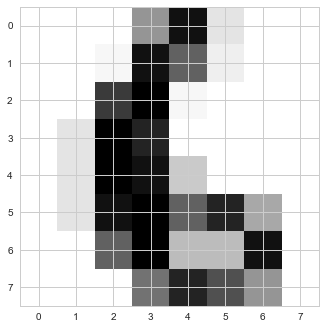

label =  6


In [74]:
image = 100
plt.imshow(X[image].reshape([8,8]))
plt.show()
print ("label = ", y[image])

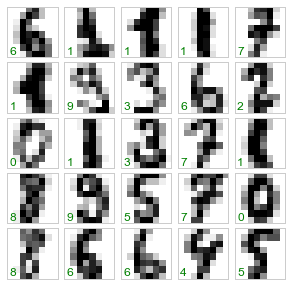

In [75]:
plot_digits_sample(X,y)

# Grid search

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Grid search
params = { 'C': [0.001, 0.01, 0.1, 1]}

model = LogisticRegression()

grid = GridSearchCV(estimator=model, cv = 10, param_grid=params )
grid.fit(X, y)
# summarize the results of the grid search
print("Best parameters: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)


Best parameters:  LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Best score:  0.965498052309


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       178
          1       0.93      0.95      0.94       182
          2       0.99      1.00      0.99       177
          3       0.98      0.93      0.96       183
          4       0.99      0.98      0.99       181
          5       0.96      0.97      0.96       182
          6       0.98      0.98      0.98       181
          7       0.98      0.98      0.98       179
          8       0.90      0.93      0.91       174
          9       0.96      0.94      0.95       180

avg / total       0.97      0.97      0.97      1797

Accuracy:  0.965498052309


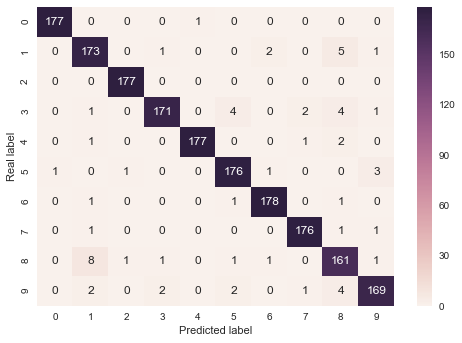

In [77]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(grid.best_estimator_, X, y, cv=10)
print (classification_report(y, y_pred))
print ("Accuracy: ", accuracy_score(y, y_pred))
cm =  confusion_matrix(y_pred=y_pred, y_true=y, labels=range(0,10))
plot_confusion_matrix(cm, range(0,10))
